In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [81]:
submission = pd.read_csv('submission/b0d4be89-d9d6-42b7-9ef5-70a40eaa1c8d.csv', sep=";")

print(submission.shape)
print(submission.head())

(2000, 17)
   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0  AMETHYSTS         9998             9       9995.0   
1    0          0  STARFRUIT         5036            23          NaN   
2    0        100  AMETHYSTS        10002             1      10000.0   
3    0        100  STARFRUIT         5042             1       5039.0   
4    0        200  AMETHYSTS         9996             1       9995.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          23.0          NaN           NaN        10005            23   
1           NaN          NaN           NaN         5043            23   
2           2.0       9998.0           4.0        10004             1   
3           2.0       5037.0           1.0         5043            22   
4          21.0          NaN           NaN        10004             1   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          NaN      

In [82]:
starfruit = submission[submission['product'] == "STARFRUIT"]
amethysts = submission[submission['product'] == "AMETHYSTS"]

print(starfruit.head())

   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
1    0          0  STARFRUIT         5036            23          NaN   
3    0        100  STARFRUIT         5042             1       5039.0   
5    0        200  STARFRUIT         5037             1       5036.0   
6    0        300  STARFRUIT         5042             1       5037.0   
9    0        400  STARFRUIT         5037            28          NaN   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
1           NaN          NaN           NaN         5043            23   
3           2.0       5037.0           1.0         5043            22   
5          21.0          NaN           NaN         5043             1   
6          26.0          NaN           NaN         5044            26   
9           NaN          NaN           NaN         5044            28   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
1          NaN           NaN          NaN           NaN   

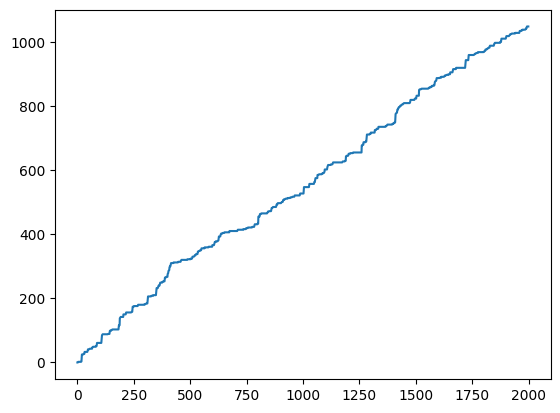

In [83]:
plt.plot(amethysts['profit_and_loss'])
plt.show()

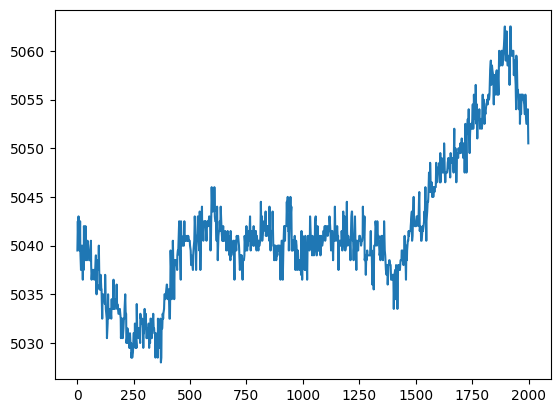

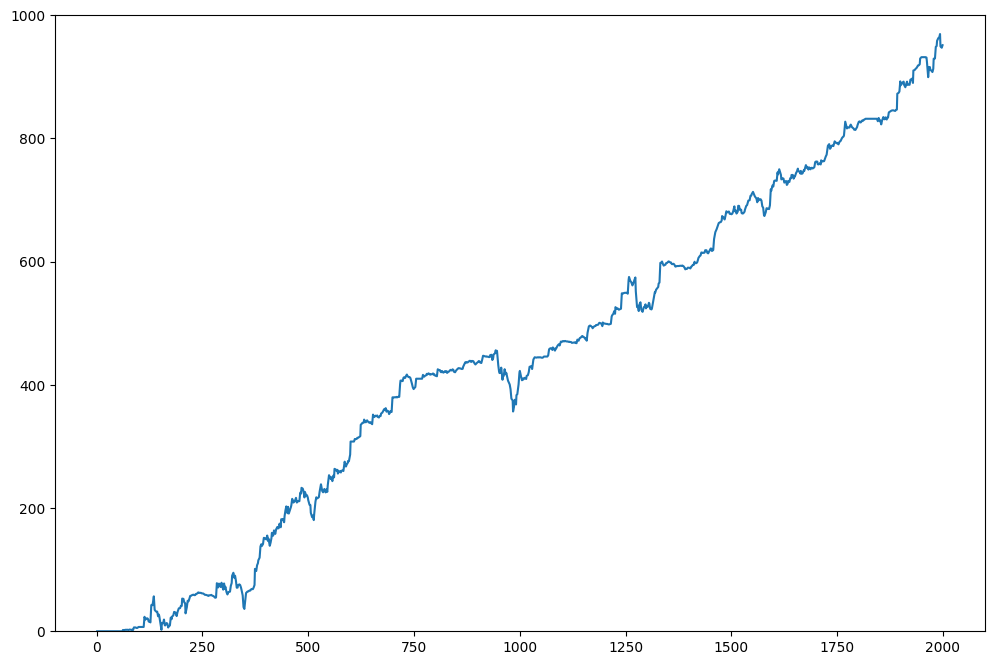

1        0.000000
3        0.000000
5        0.000000
6        0.000000
9        0.000000
          ...    
991    368.257812
992    383.406250
994    384.812500
997    400.765625
999    419.554688
Name: profit_and_loss, Length: 500, dtype: float64


In [84]:
plt.plot(starfruit['mid_price'])
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(starfruit['profit_and_loss'])
ax1.set_ylim([0,1000])
plt.show()

print(starfruit['profit_and_loss'][:500])

In [85]:
# find the total volume of trades for amethyst
amethysts['bid_volume_1'].fillna(0, inplace=True)
amethysts['bid_volume_2'].fillna(0,inplace=True)
amethysts['bid_volume_3'].fillna(0,inplace=True)

amethysts['ask_volume_1'].fillna(0, inplace=True) 
amethysts['ask_volume_2'].fillna(0,inplace=True) 
amethysts['ask_volume_3'].fillna(0,inplace=True)

amethysts['total_bid_vol'] = amethysts['bid_volume_1'] + amethysts['bid_volume_2'] + amethysts['bid_volume_3']

amethysts['total_ask_vol'] = amethysts['ask_volume_1'] + amethysts['ask_volume_2'] + amethysts['ask_volume_3']

print(amethysts.head())


   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0  AMETHYSTS         9998             9       9995.0   
2    0        100  AMETHYSTS        10002             1      10000.0   
4    0        200  AMETHYSTS         9996             1       9995.0   
7    0        300  AMETHYSTS         9995            26          NaN   
8    0        400  AMETHYSTS         9998             8       9996.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          23.0          NaN           0.0        10005            23   
2           2.0       9998.0           4.0        10004             1   
4          21.0          NaN           0.0        10004             1   
7           0.0          NaN           0.0        10005            26   
8           2.0       9995.0          26.0        10004             2   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           0.0          NaN           0.0   

C:\Users\Acer\AppData\Local\Temp\ipykernel_36256\3589317347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethysts['bid_volume_1'].fillna(0, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_36256\3589317347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethysts['bid_volume_2'].fillna(0,inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_36256\3589317347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amet

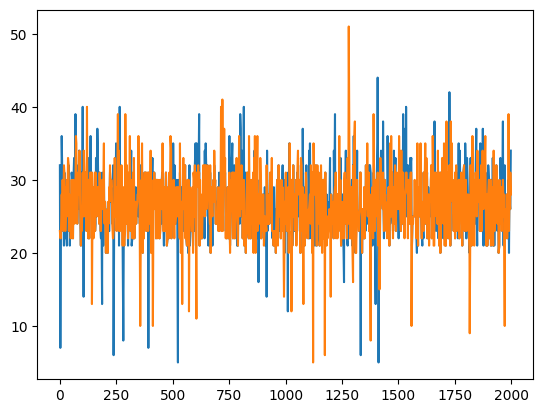

In [87]:
plt.plot(amethysts['total_bid_vol'])
plt.plot(amethysts['total_ask_vol'])
plt.show()

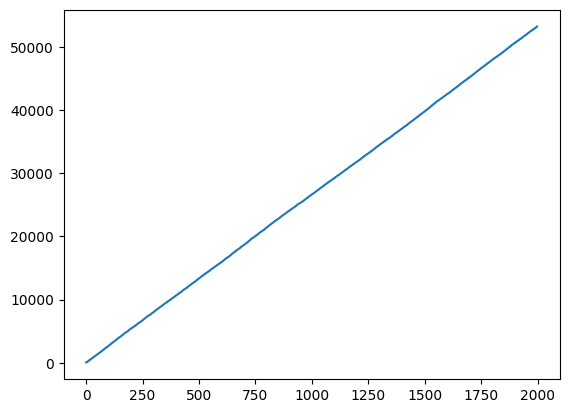

In [67]:
total_volume = amethysts['total_bid_vol'] + amethysts['total_ask_vol']
plt.plot(total_volume.cumsum())
plt.show()

7.55471872408232
53.235


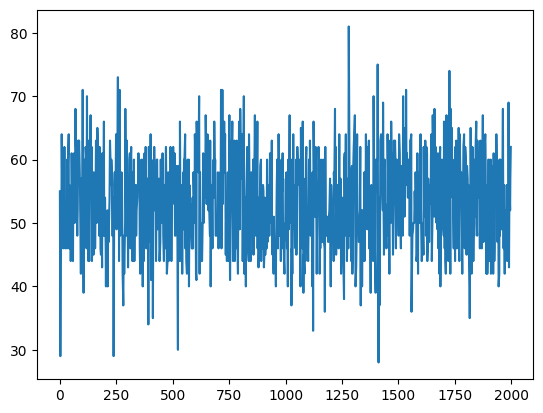

In [90]:
plt.plot(total_volume)
std_dev = np.std(total_volume)
mean = np.mean(total_volume)
print(std_dev)
print(mean)

In [93]:
print(total_volume.corr(amethysts['mid_price']))

0.02519643069926041


0.02519643069926041


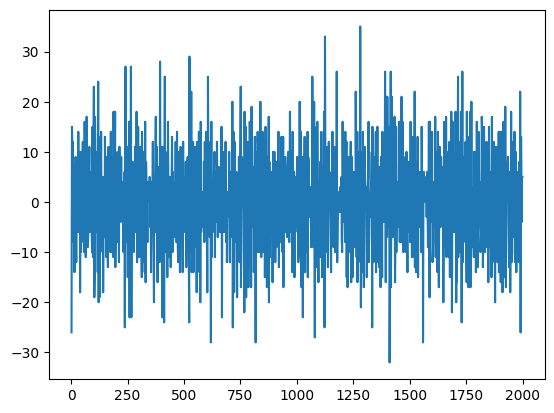

In [92]:
plt.plot(total_volume.diff())


-0.009084314428300521


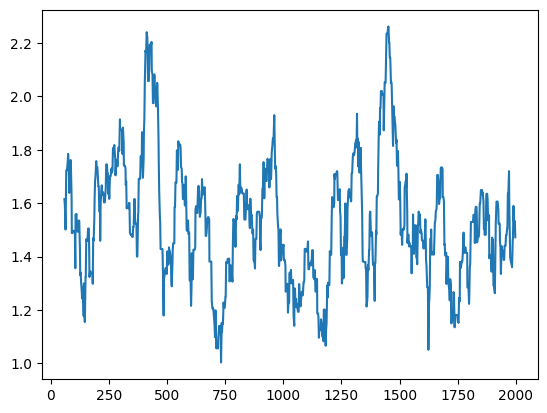

In [95]:
rolling_vol_30 = amethysts['mid_price'].rolling(30).std()
print(total_volume.corr(rolling_vol_30))

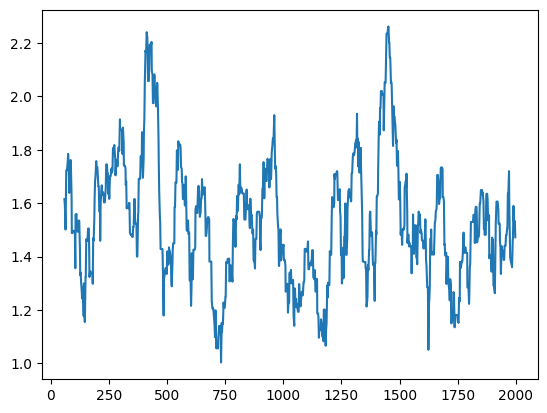

In [96]:

plt.plot(rolling_vol_30)

In [70]:
submission_robust_amethyst = pd.read_csv("submission/50f71883-4248-4c47-8aac-d56036f97acd.csv", sep=";")

robust_amethyst = submission_robust_amethyst[submission_robust_amethyst['product'] == "AMETHYSTS"]

print(robust_amethyst.head())

   day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0  AMETHYSTS         9998             9       9995.0   
2    0        100  AMETHYSTS        10002             1      10000.0   
4    0        200  AMETHYSTS         9996             1       9995.0   
7    0        300  AMETHYSTS         9995            26          NaN   
8    0        400  AMETHYSTS         9998             8       9996.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          23.0          NaN           NaN        10005            23   
2           2.0       9998.0           4.0        10004             1   
4          21.0          NaN           NaN        10004             1   
7           NaN          NaN           NaN        10005            26   
8           2.0       9995.0          26.0        10004             2   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          NaN           NaN   

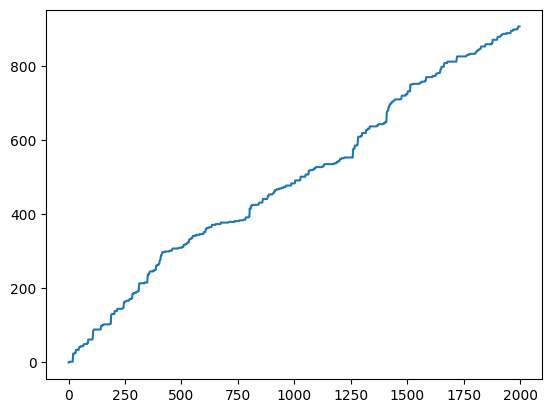

In [71]:
plt.plot(robust_amethyst['profit_and_loss'])